# **Вводные преобразования**

In [60]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [22]:
# получение csv-файла
google_url = 'https://docs.google.com/spreadsheets/d/1Rmw4nLN7cxRnhFFrIETh3gx8Gxcv56hV/edit#gid=548315443'
new_google_url = google_url.replace('edit#gid', 'export?format=csv&gid')
df=pd.read_csv(new_google_url)

In [24]:
# переведем True и False в строки для удобства в столбцах с уверенностью
df['Поставьте галочку, если уверены на 100%'] = df['Поставьте галочку, если уверены на 100%'].replace(True, 'да')
df['Поставьте галочку, если уверены на 100%'] = df['Поставьте галочку, если уверены на 100%'].replace(False, 'нет')
df['Если 75%'] = df['Если 75%'].replace(True, 'да')
df['Если 75%'] = df['Если 75%'].replace(False, 'нет')
df['Если 50%'] = df['Если 50%'].replace(True, '50%')
df['Если 50%'] = df['Если 50%'].replace(False, 'нет')

In [25]:
# создадим новый столбец "Уверенность в диагнозе", чтобы объединить три предыдущих
# заменим "да" на соответствующий процент ("100%", "75%", "50%")
df["Уверенность в диагнозе"] = df.apply(
    lambda row: "100%"
    if row["Поставьте галочку, если уверены на 100%"] == "да"
    else ("75%" if row["Если 75%"] == "да" else "50%"), axis=1)

# удалим старые столбцы
df = df.drop(columns=["Поставьте галочку, если уверены на 100%", "Если 75%", "Если 50%"])
df

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Альтернатива, если 50% - обязательно",Комментарий,Уверенность в диагнозе
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,0,0,100%
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,0,0,100%
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,Дурвалумаб,Нет доказательной базы для назначения после пе...,75%
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,0,Возможно есть мутации и эффективность Дурвалум...,75%
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,0,Возможно есть мутации и эффективность Дурвалум...,75%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси...",50%
248828,248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,0,0,100%
248829,248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але...",50%
248830,248831,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але...",50%


In [26]:
# создадим экземпляр LabelEncoder
label_encoder = LabelEncoder()

# применим LabelEncoder ко всем столбцам
for col in df.columns:
    if df[col].dtype == 'object':  # Проверка, что столбец имеет тип 'object'
        df[col] = label_encoder.fit_transform(df[col].astype(str))

In [27]:
df.head(10)

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Альтернатива, если 50% - обязательно",Комментарий,Уверенность в диагнозе
0,1,0,1,1,0,0,0,0,0,0,0,1,5,2,0,1,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,2,5,2,0,1,0,0,0
2,3,0,1,1,0,0,0,0,0,0,0,0,5,2,0,2,2,10,2
3,4,0,1,1,0,0,0,0,0,0,0,1,4,2,0,1,0,7,2
4,5,0,1,1,0,0,0,0,0,0,0,2,4,2,0,1,0,7,2
5,6,0,1,1,0,0,0,0,0,0,0,0,4,2,0,2,2,10,2
6,7,0,1,1,0,0,0,0,0,0,0,1,3,2,0,2,0,5,0
7,8,0,1,1,0,0,0,0,0,0,0,2,3,2,0,2,0,5,0
8,9,0,1,1,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0
9,10,0,1,1,0,0,0,0,0,0,0,1,1,2,0,3,3,5,2


# **Выявление значимых признаков через решающие деревья и регрессию (многомерный анализ)**

<Axes: >

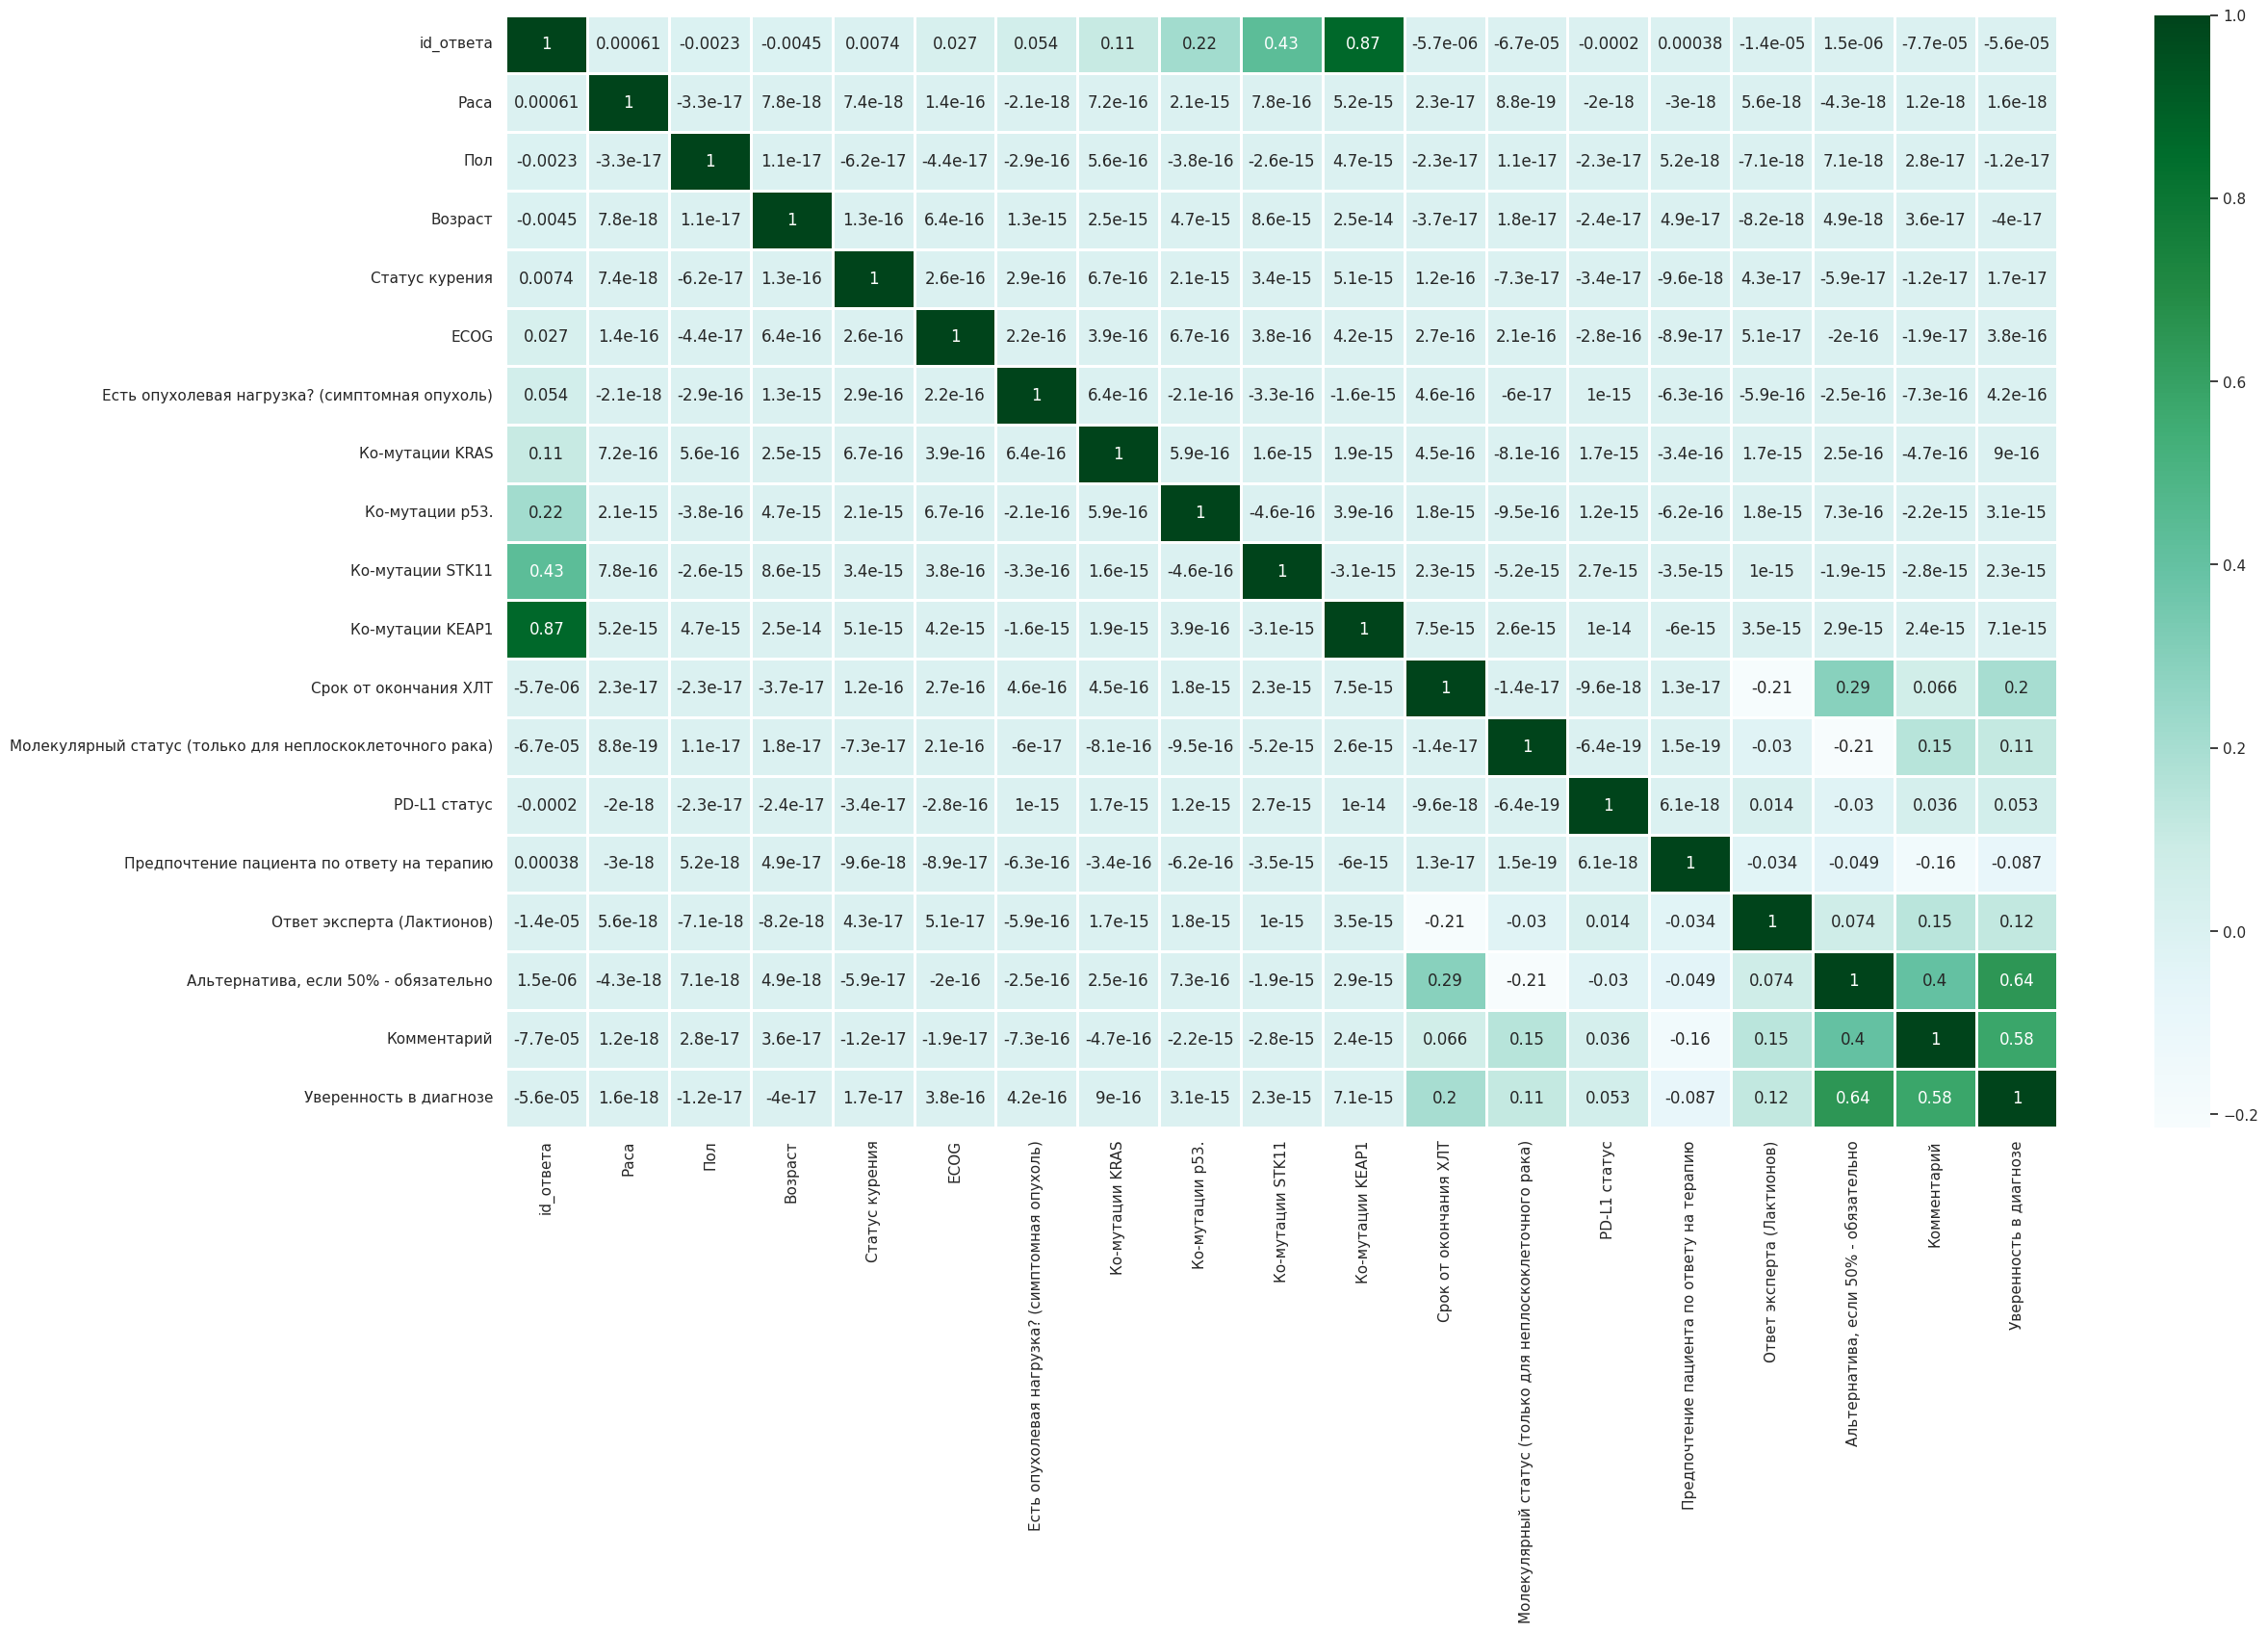

In [29]:
# построим тепловую карту
df_cor = df
# задаем размер тепловой карты
sns.set(rc = {'figure.figsize':(26,15)})
# добавляем надписи по осям X, Y, регулируем отступы между ячейками, выносим шкалу справа
sns.heatmap(df_cor.corr(), annot=True, linewidths=1, cbar=True, cmap='BuGn')

In [30]:
# удаляем ненужные колонки
df_to_regressor = df.drop(columns=['id_ответа'])

In [31]:
df_to_regressor.count()

Раса                                                        248832
Пол                                                         248832
Возраст                                                     248832
Статус курения                                              248832
ECOG                                                        248832
Есть опухолевая нагрузка? (симптомная опухоль)              248832
Ко-мутации KRAS                                             248832
Ко-мутации p53.                                             248832
Ко-мутации STK11                                            248832
Ко-мутации KEAP1                                            248832
Срок от окончания ХЛТ                                       248832
Молекулярный статус (только для неплоскоклеточного рака)    248832
PD-L1 статус                                                248832
Предпочтение пациента по ответу на терапию                  248832
Ответ эксперта (Лактионов)                                  24

In [32]:
# построение вектора важности признаков из рандомизированного леса принятия решений.
# в качестве функции стоимости здесь лучше подходит MSE
X=df_to_regressor.iloc[:, 0:13]
Y=df_to_regressor.iloc[:, 14:17]

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X, Y)

RandomForestRegressor(max_depth=20, random_state=0)

<Figure size 1200x1200 with 0 Axes>

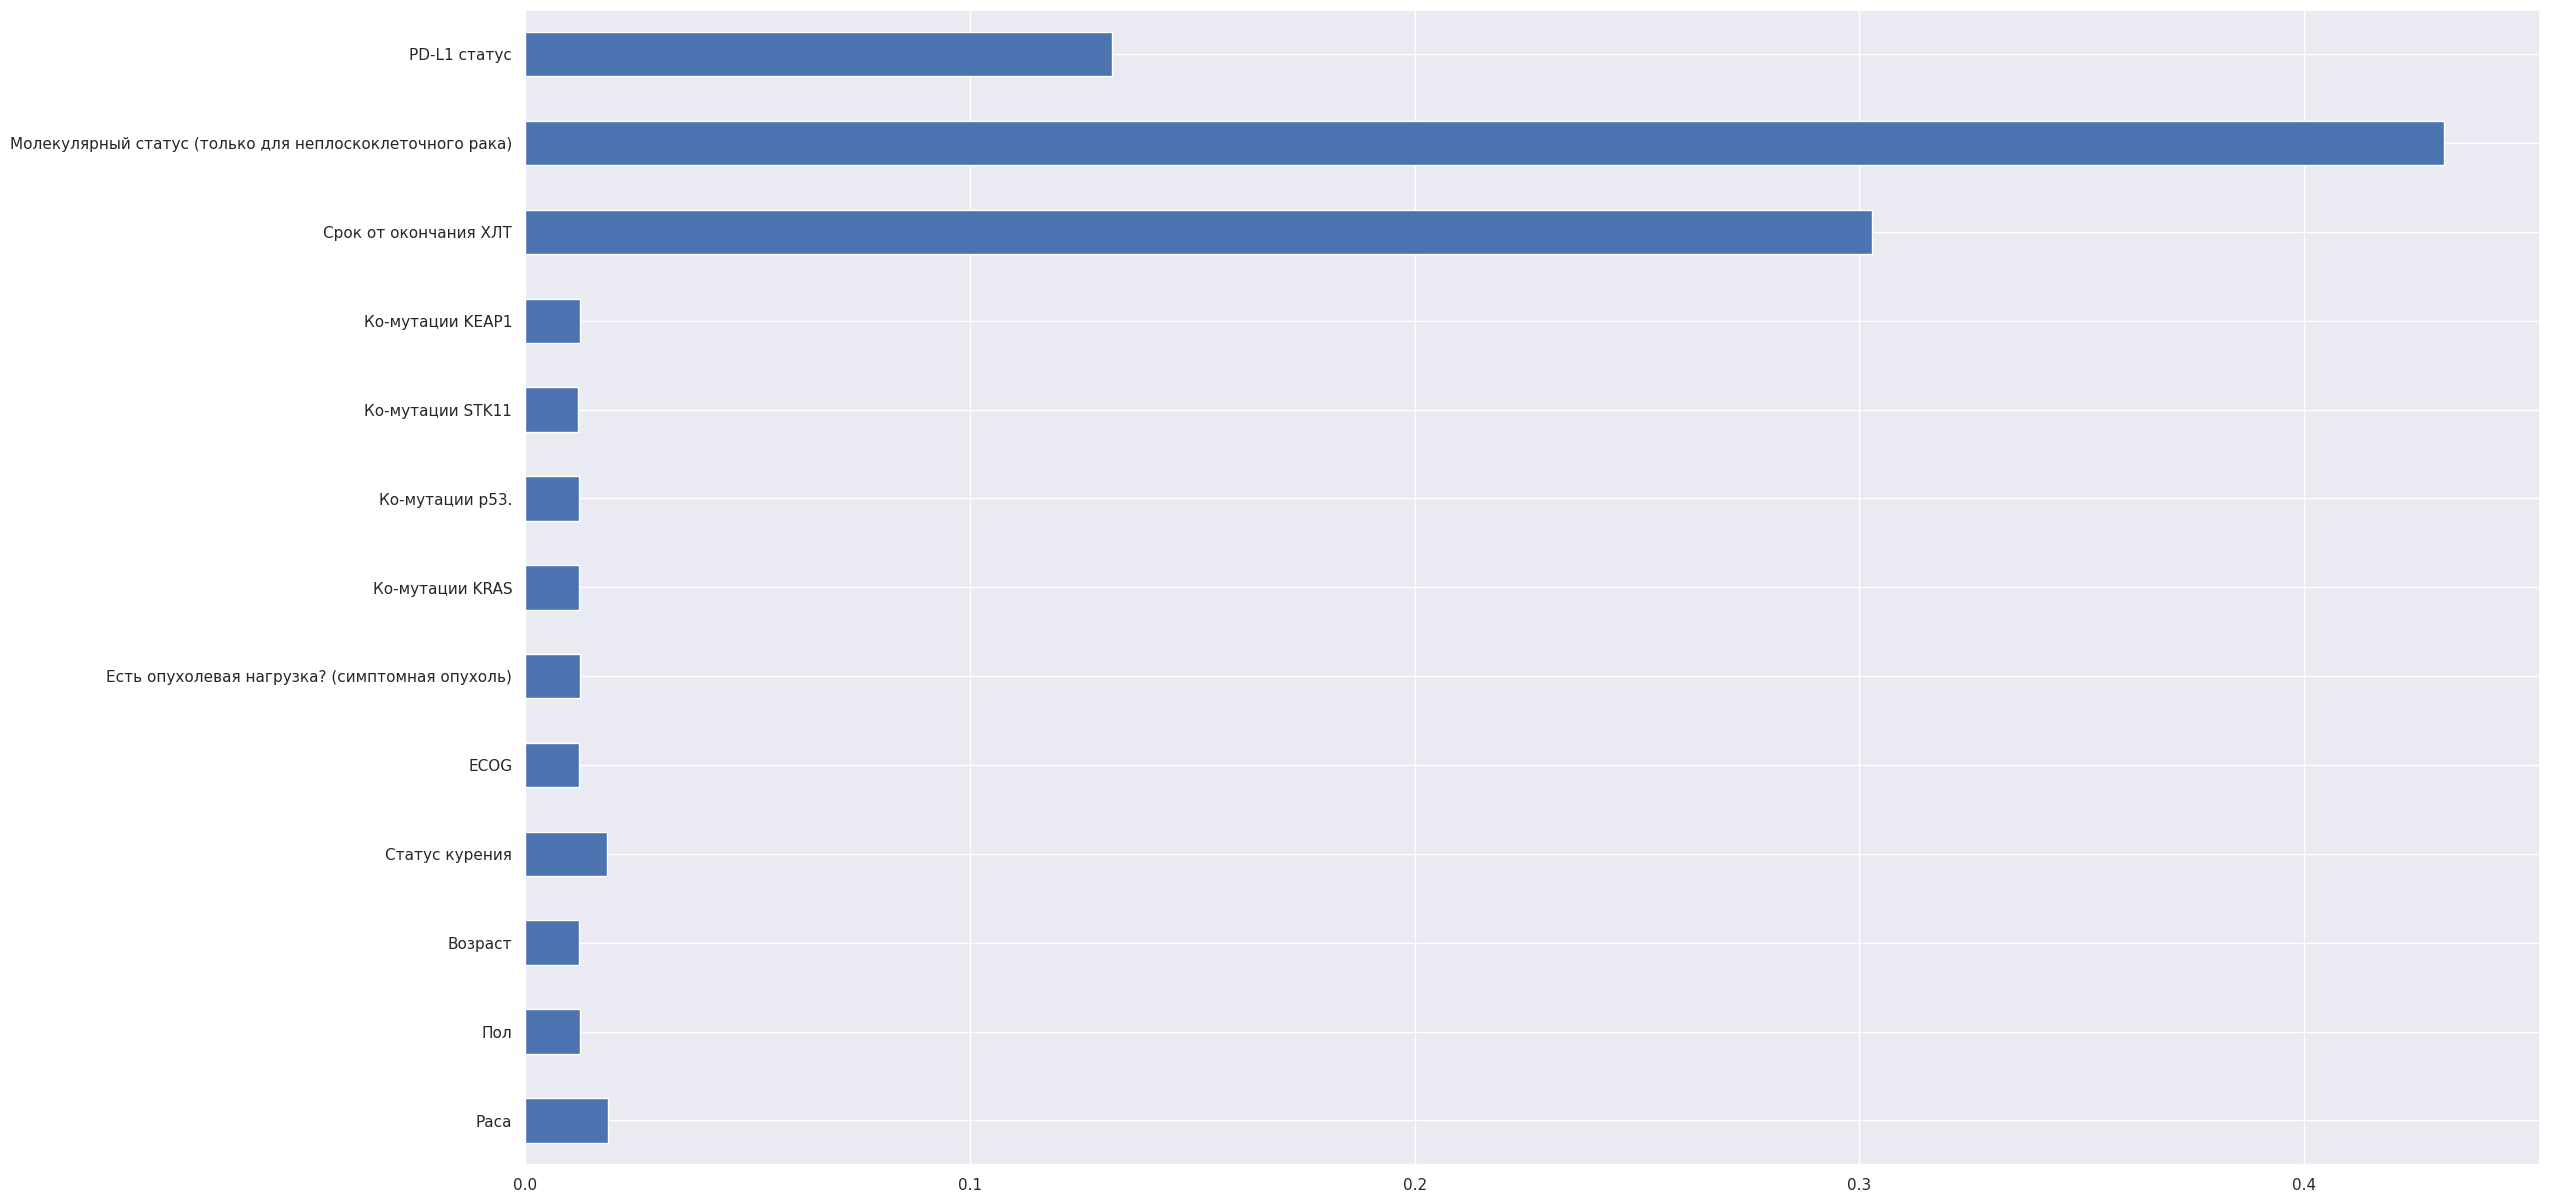

<Figure size 1200x1200 with 0 Axes>

In [35]:
# гистрограмма важности признаков
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.figure(figsize=(12,12))

**ТОП-3 признака по значимости:**
*   Молекулярный статус
*   Срок от окончания ХЛТ
*   PD-L1 статус

**Небольшое выделение на фоне остальных признаков:**
*   Статус курения
*   Раса

# **Выявление значимых признаков через Future Selection (одномерный анализ)**

In [46]:
# удаляем ненужные колонки
df_to_selection = df.drop(columns=['id_ответа'])

In [47]:
# разделим на входные и целевые столбцы
a = df_to_selection.iloc[:, 0:13]
b = df_to_selection.iloc[:, 14]

In [48]:
# для оценки значимости признаков используется мера хи-квадрат (score_func=chi2)
# определение ТОП-5 значимых признаков (k=5)
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(a,b)
# dfscores содержит значения важности каждого признака с помощью fit.scores_
dfscores = pd.DataFrame(fit.scores_)
# dfcolumns содержит имена столбцов из матрицы признаков a
dfcolumns = pd.DataFrame(a.columns)
# объединение результатов
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# вывод лучших результатов
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(5,'Score'))

                                                Specs         Score
11  Молекулярный статус (только для неплоскоклеточ...  1.369749e+05
10                              Срок от окончания ХЛТ  1.419852e+04
12                                       PD-L1 статус  1.472850e+03
0                                                Раса  3.547142e-20
3                                      Статус курения  3.547142e-20


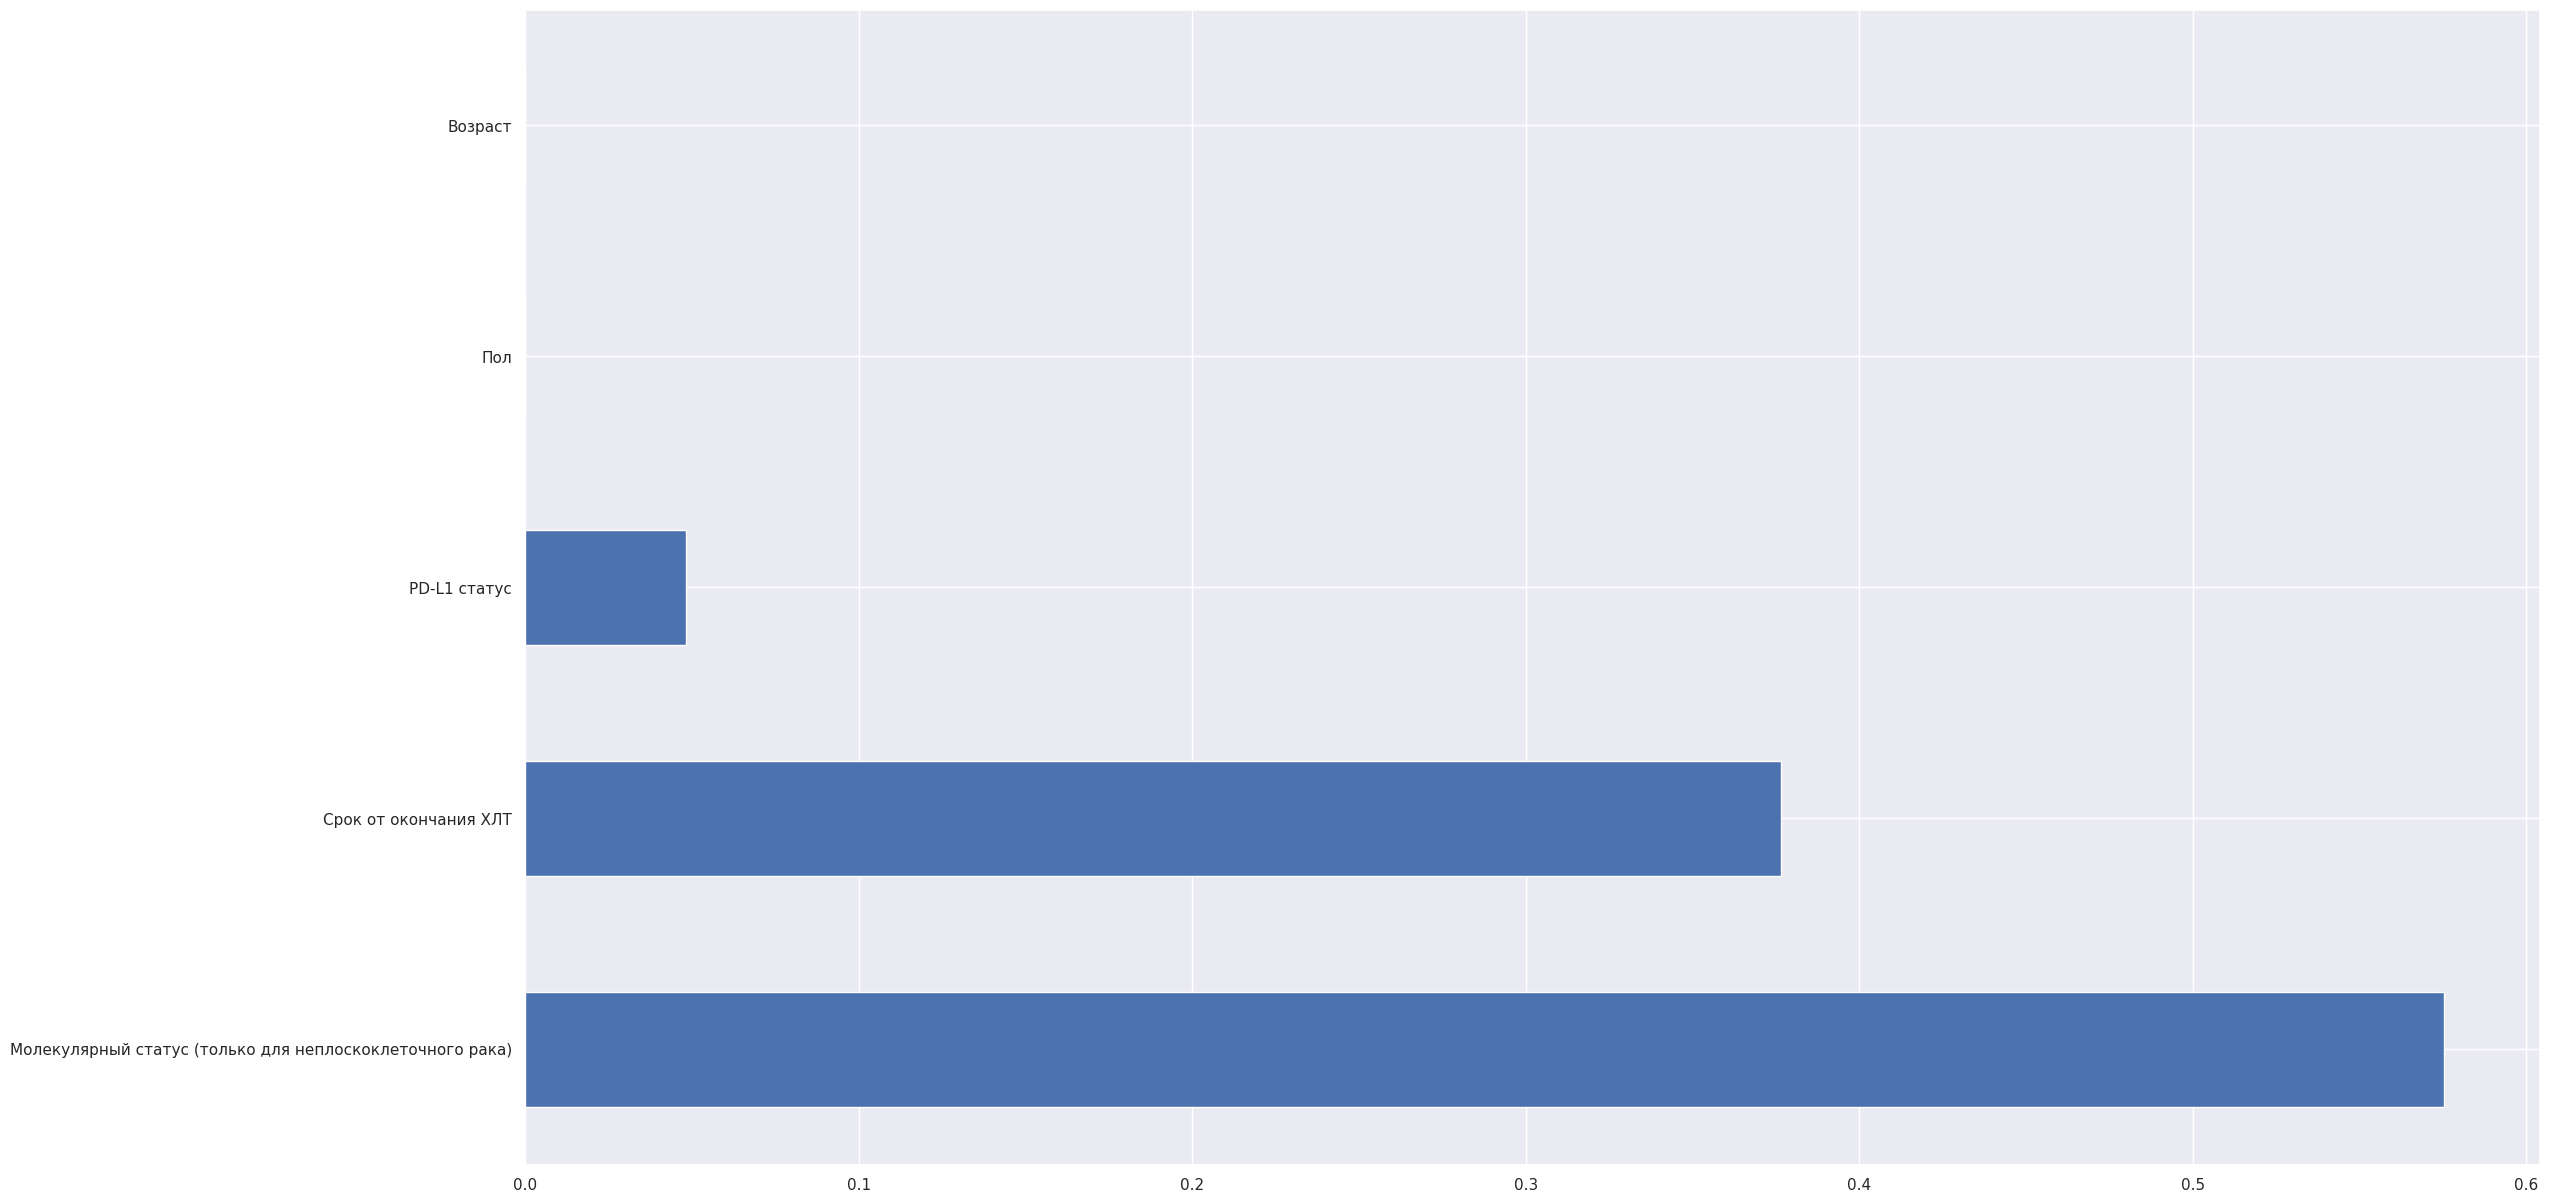

<Figure size 300x300 with 0 Axes>

In [54]:
# ExtraTreesClassifier использоваться для оценки важности признаков
model = ExtraTreesClassifier()
model.fit(a,b)
#print(model.feature_importances_)
# вывод результатов в виде графика
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

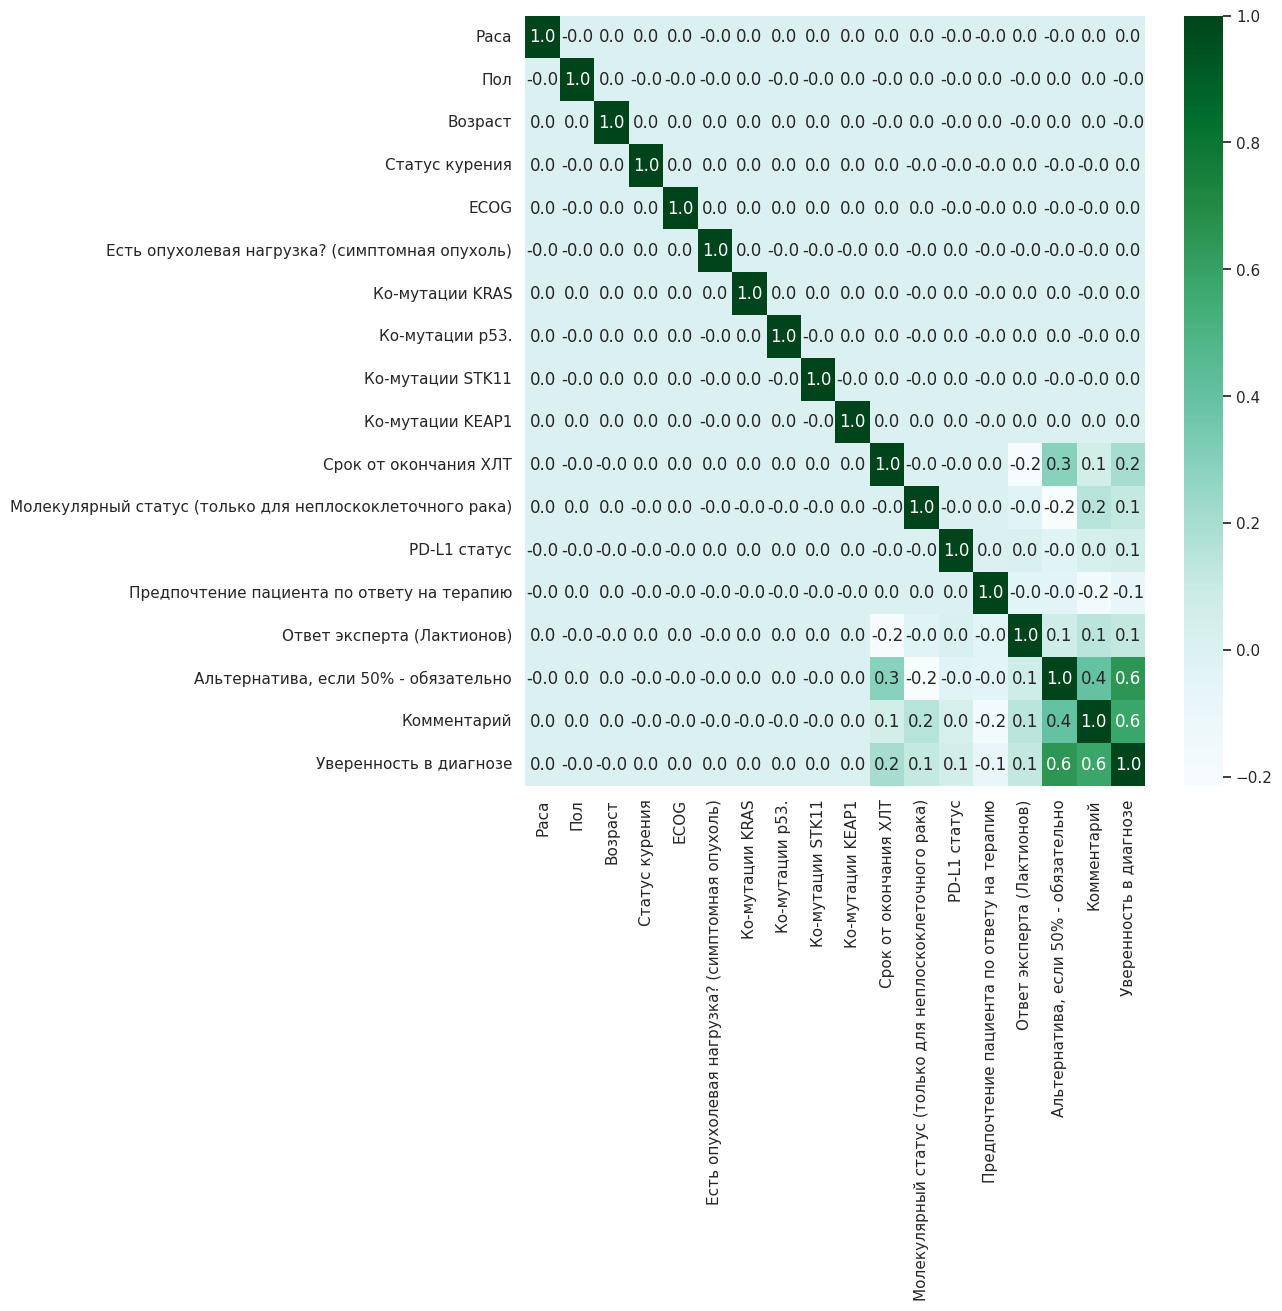

In [59]:
# получение корреляций
corrmat = df_to_selection.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
# построение тепловой карты (ограничение 1 знака после запятой fmt='.1f')
g=sns.heatmap(df_to_selection[top_corr_features].corr(),annot=True,cmap='BuGn', fmt='.1f')

# **Выводы**

*   Для анализа датасета были использованы подходы RandomForestRegressor (в качестве целевых переменных выбирался ответ эксперта, уверенность в рекомендации, комментарий и альтернатива) и ExtraTreesClassifier (в качестве целевой переменной передавался только ответ эксперта).
*   Особую значимость в первом случае представляют следующие признаки: Молекулярный статус, Срок от окончания ХЛТ, PD-L1 статус + Статус курения, Раса.
*   Особую значимость во втором случае представляют следующие признаки: Молекулярный статус, Срок от окончания ХЛТ, PD-L1 статус + Пол, Возраст
*   При анализе несколькими методами ТОП-3 признака совпадают
